In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import struct
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Veri setini yükleme fonksiyonu
def load_dataset(path, kind='train'):
    images_path = f'{path}/{kind}-images.idx3-ubyte'
    labels_path = f'{path}/{kind}-labels.idx1-ubyte'

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

# Veri setini yükle
dataset_path = 'C:/Users/ckasikci/Desktop/data'  # Veri setinin bulunduğu dizini belirtin
train_images, train_labels = load_dataset(dataset_path, kind='train')
test_images, test_labels = load_dataset(dataset_path, kind='t10k')

# Veriyi düzleştirme ve normalize etme
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Veriyi eğitim ve test setlerine bölme
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
model_one = Sequential()
model_one.add(Dense(128, activation='relu', input_shape=(784,)))
model_one.add(Dropout(0.3))
model_one.add(Dense(64, activation='relu'))
model_one.add(Dropout(0.3))
model_one.add(Dense(10, activation='softmax'))
model_one.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_one.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

model_two = Sequential()
model_two.add(Dense(256, activation='relu', input_shape=(784,)))
model_two.add(Dropout(0.5))
model_two.add(Dense(128, activation='relu'))
model_two.add(Dropout(0.5))
model_two.add(Dense(10, activation='softmax'))
model_two.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_two.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

model_three = Sequential()
model_three.add(Dense(64, activation='relu', input_shape=(784,)))
model_three.add(Dropout(0.2))
model_three.add(Dense(32, activation='relu'))
model_three.add(Dropout(0.2))
model_three.add(Dense(10, activation='softmax'))
model_three.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_three.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# Modellerin performansını değerlendirme
for i, model in enumerate([model_one, model_two, model_three]):
    test_pred = np.argmax(model.predict(test_images), axis=1)
    accuracy = accuracy_score(test_labels, test_pred)
    print(f"Model {i+1} Accuracy: {accuracy}")







Epoch 1/5


750/750 [==============================] - 2s 2ms/step - loss: 0.4807 - accuracy: 0.8530 - val_loss: 0.1828 - val_accuracy: 0.9464
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.2321 - accuracy: 0.9322 - val_loss: 0.1364 - val_accuracy: 0.9592
Epoch 3/5
750/750 [==============================] - 1s 2ms/step - loss: 0.1800 - accuracy: 0.9464 - val_loss: 0.1175 - val_accuracy: 0.9643
Epoch 4/5
750/750 [==============================] - 1s 2ms/step - loss: 0.1563 - accuracy: 0.9536 - val_loss: 0.1017 - val_accuracy: 0.9693
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 0.1347 - accuracy: 0.9594 - val_loss: 0.0958 - val_accuracy: 0.9706
Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 0.5105 - accuracy: 0.8438 - val_loss: 0.1777 - val_accuracy: 0.9471
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.2538 - accuracy: 0.9274 - val_loss: 0.1351 - val_accuracy: 0.9596
Epoch 3/

313/313 [==============================] - 0s 796us/step


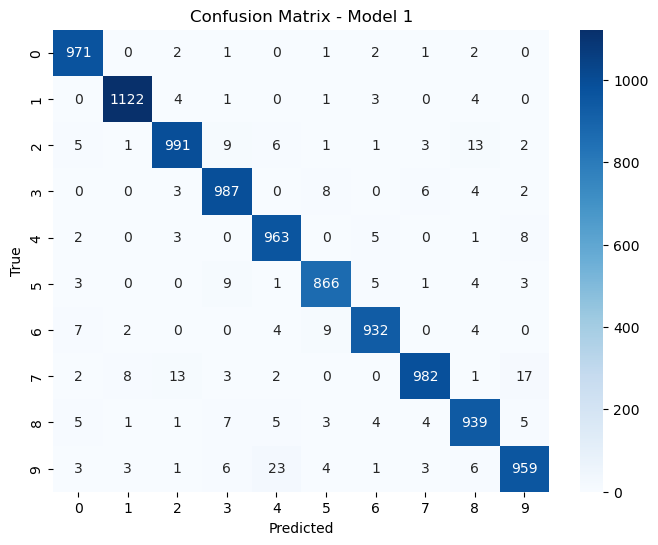

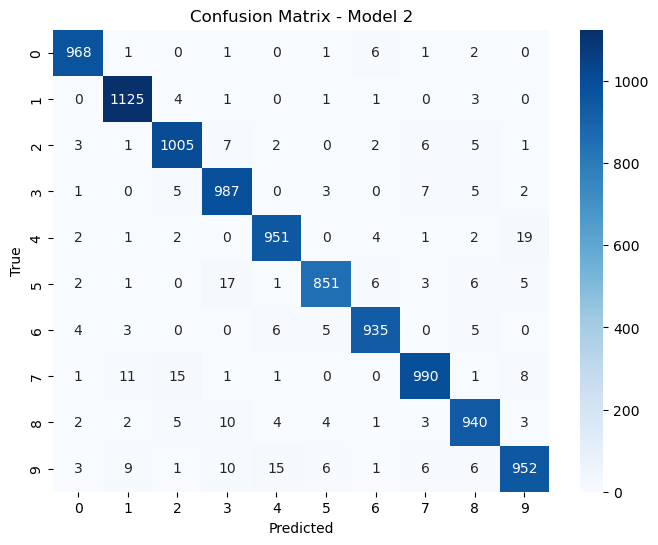

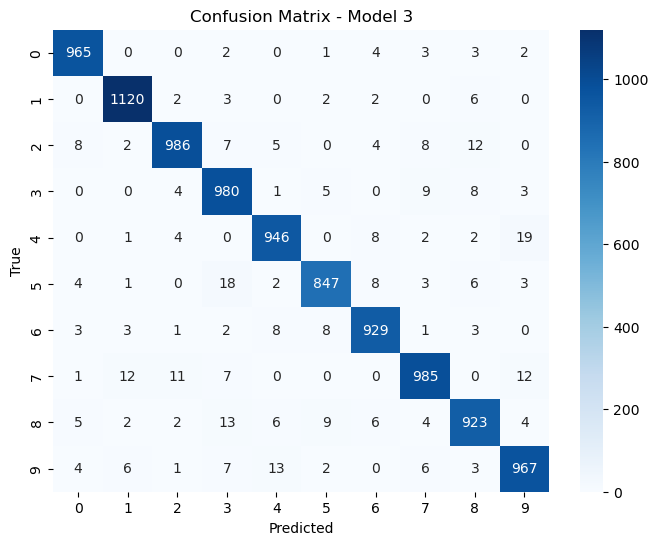

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin test seti üzerindeki tahminleri
test_predictions = [np.argmax(model.predict(test_images), axis=1) for model in [model_one, model_two, model_three]]

# Her bir modelin confusion matrix'ini oluştur
for i, test_pred in enumerate(test_predictions):
    cm = confusion_matrix(test_labels, test_pred)
    
    # Heatmap ile confusion matrix'i görselleştirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
    plt.title(f"Confusion Matrix - Model {i+1}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()



In [5]:
num_test_examples = len(test_images)
print(f"Test veri setindeki örnek sayısı: {num_test_examples}")



Test veri setindeki örnek sayısı: 10000



Hatalı Tahminler - Model 1:


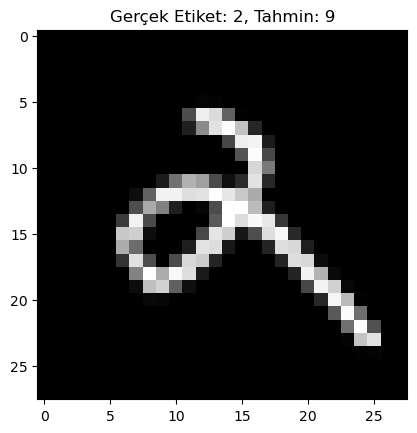

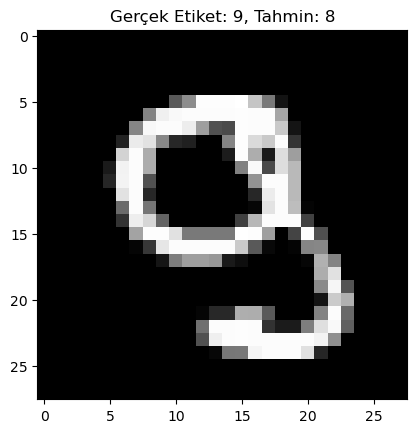

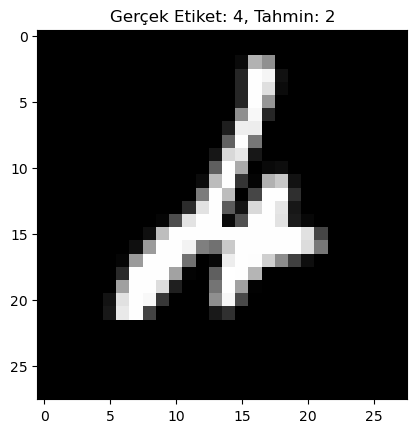


Hatalı Tahminler - Model 2:


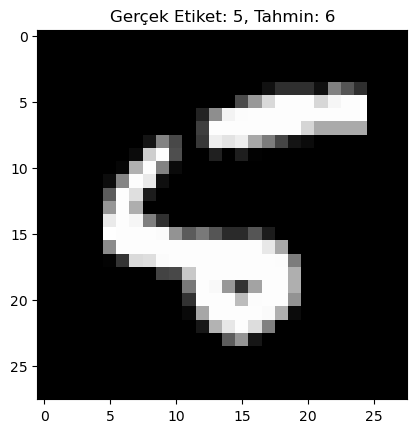

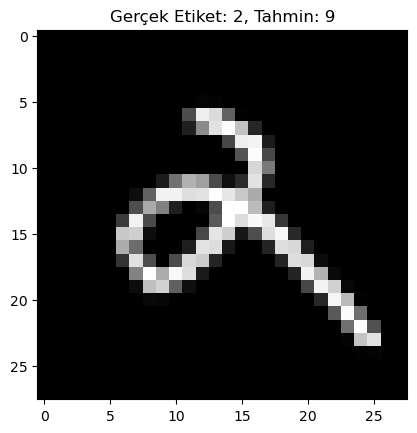

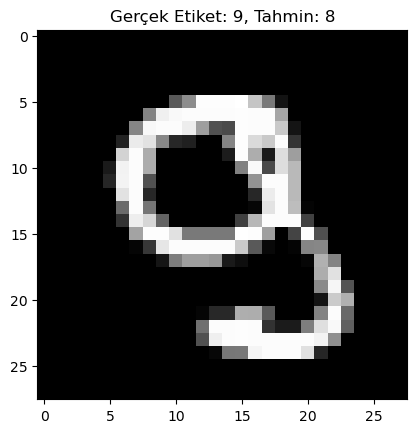


Hatalı Tahminler - Model 3:


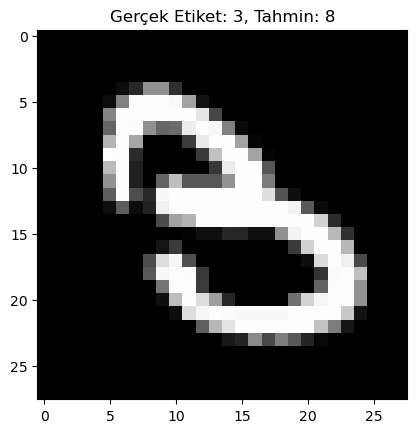

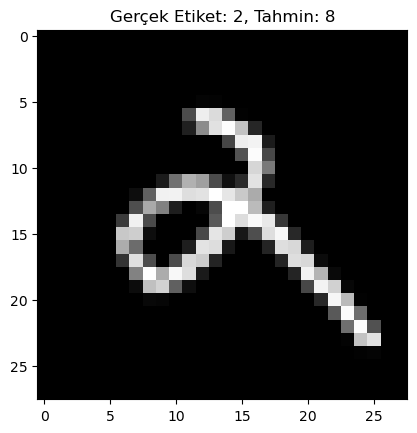

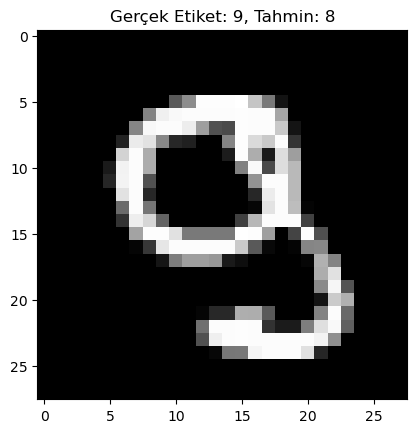

In [6]:
incorrect_indices_list = []

# Her bir model için hatalı tahminleri bul
for i, test_pred in enumerate(test_predictions):
    incorrect_indices_list.append(np.where(test_pred != test_labels)[0])

# Her bir model için 3 tane hatalı tahmin örneğini yazdır
for i, indices in enumerate(incorrect_indices_list):
    print(f"\nHatalı Tahminler - Model {i+1}:")
    for j in range(3):  # İlk 3 hatalı tahmini yazdır
        incorrect_index = indices[j]
        incorrect_image = test_images[incorrect_index].reshape(28, 28)
        incorrect_label = test_labels[incorrect_index]
        predicted_label = test_predictions[i][incorrect_index]
        
        plt.imshow(incorrect_image, cmap='gray')
        plt.title(f"Gerçek Etiket: {incorrect_label}, Tahmin: {predicted_label}")
        plt.show()


In [7]:

from collections import Counter

# Test setindeki her bir etiketten kaç adet örnek olduğunu bul
label_counts = Counter(test_labels)

# Her bir etiketin kaç adet örneği olduğunu yazdır
for label, count in label_counts.items():
    print(f"Etiket {label}: {count} adet örnek")

Etiket 7: 1028 adet örnek
Etiket 2: 1032 adet örnek
Etiket 1: 1135 adet örnek
Etiket 0: 980 adet örnek
Etiket 4: 982 adet örnek
Etiket 9: 1009 adet örnek
Etiket 5: 892 adet örnek
Etiket 6: 958 adet örnek
Etiket 3: 1010 adet örnek
Etiket 8: 974 adet örnek
